In [7]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import keras.backend as K

%matplotlib inline

In [130]:
from keras.preprocessing.image import array_to_img

def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(32, 32)) # was 150
    img_gscale = np.dot(np.array(img, dtype='float32'), [[0.2989],[0.5870],[0.1140]]) # grayscale
    
    # standardise image data
    mean = np.mean(img_gscale, dtype='float32')
    std = np.std(img_gscale, dtype='float32', ddof=1)
    if std < 1e-4: std = 1.
    im_final = (img_gscale - mean) / std
    
    # (1, height, width, channels), 
    # add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor = np.expand_dims(im_final, axis=0)         
    
    print(img_tensor.shape, im_final.shape)
    
    um_img = im_final[:,:,0] # was img_gscale
    plt.imshow(um_img + abs(um_img.min()))

    return img_tensor   # was img_tensor 

(150, 150, 1) (1, 150, 150, 1)


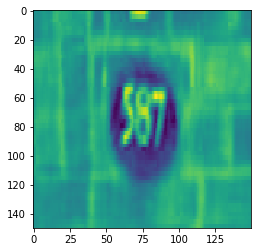

In [66]:
# load model
model = load_model("/Users/billcoleman/NOTEBOOKS/DEEP_LEARNING_TUD/ASSIGNMENT/saved_models/keras_colabSVHNIV_tr230070_te13068_ep5_batch32.h5",
                  custom_objects={'precision': precision,
                                 'recall': recall,
                                 'fbeta_score': fbeta_score,
                                 'fmeasure': fmeasure})

(1, 32, 32, 1) (32, 32, 1)


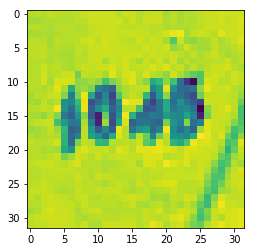

In [134]:
# image path
#img_path = '/Users/billcoleman/NOTEBOOKS/DEEP_LEARNING_TUD/ASSIGNMENT/street_view_house_numbers-master/75_crop.png'    # dog
#img_path = '/Users/billcoleman/NOTEBOOKS/DEEP_LEARNING_TUD/ASSIGNMENT/street_view_house_numbers-master/231_crop.png'    # dog
img_path = '/Users/billcoleman/NOTEBOOKS/DEEP_LEARNING_TUD/ASSIGNMENT/street_view_house_numbers-master/232_crop.png'      # cat

# load a single image
new_image = load_image(img_path)

In [135]:

# check prediction
pred = model.predict(new_image)
print(np.argmax(pred[0]), np.argmax(pred[1]), np.argmax(pred[2]), np.argmax(pred[3]), np.argmax(pred[4]))

1 0 4 8 10


In [136]:
for j in range(0,5):
  dig = np.argmax(pred[j][0])
  if dig == 10:
        dig = "no digit"
        print("Digit ", j, ": ", dig)
  else:
    dig = str(dig)
    print("Digit ", j, ": ", dig)

Digit  0 :  1
Digit  1 :  0
Digit  2 :  4
Digit  3 :  8
Digit  4 :  no digit


In [111]:
pred[0]

array([[2.5799098e-09, 1.9432468e-06, 9.9998796e-01, 1.9491306e-06,
        6.1924693e-06, 6.4913451e-07, 1.2054306e-07, 6.9442734e-07,
        2.4370487e-07, 2.8384127e-07, 2.5634578e-13]], dtype=float32)

In [5]:
def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fbeta_score(y_true, y_pred, beta=1):
    """Computes the F score.
    The F score is the weighted harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    """
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score


def fmeasure(y_true, y_pred):
    """Computes the f-measure, the harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    """
    return fbeta_score(y_true, y_pred, beta=1)